In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import  classification_report
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [4]:
data = "../DataSets/heart.csv"
df = pd.read_csv(data)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
x = np.array(heart_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
x[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [9]:
y = np.asarray(heart_df['target'])
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [10]:
#preprocessing
scaler = preprocessing.StandardScaler()
x_scaler = scaler.fit(x).transform(x)
x_scaler[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [11]:
#train_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [12]:
#model
#solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
LR = LogisticRegression(C = 0.1, solver = 'liblinear').fit(x_train, y_train)

In [13]:
y_predicted = LR.predict(x_test)

In [14]:
y_prob = LR.predict_proba(x_test)

In [15]:
print(heart_df['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


In [16]:
#jacard
jaccard_score(y_test, y_predicted, pos_label = 0)

0.8076923076923077

In [17]:
#conf_matrix
def plot_confusion_matrix(cm, classes, normalize = 'False', cmap = plt.cm.Blues, title='title'):
     """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
     if normalize:
          cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
          print("Normalized confusion matrix")
     else:
          print('Confusion matrix, without normalization')
     print(cm)

     plt.imshow(cm, interpolation = 'nearest', cmap = cmap)           
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     fmt = '.2f' if normalize else 'd'
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predicted, labels=[1,0]))

[[35  1]
 [ 4 21]]


Confusion matrix, without normalization
[[35  1]
 [ 4 21]]


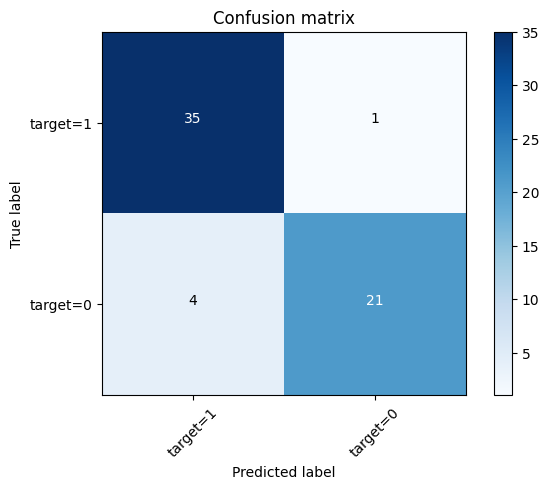

In [18]:
#compute_conf_matrix
conf_matrix = confusion_matrix(y_test, y_predicted, labels = [1,0])
np.set_printoptions(precision = 2)

#plot
plt.figure()
plot_confusion_matrix(conf_matrix, classes = ['target=1', 'target=0'], normalize = False, title='Confusion matrix')

In [19]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [20]:
#log_loss
print (log_loss(y_test, y_prob))

0.3320790120700794
